# HUẤN LUYỆN MÔ HÌNH ANN
Thực hiện huấn luyện mô hình mạng nơ-ron nhân tạo (ANN) trên tập dữ liệu đã chia.


#### Khai báo thư viện

In [1]:
# Import các thư viện cần thiết
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import Input, Sequential
from keras.src.callbacks import EarlyStopping
from keras.src.layers import Dense, Dropout

2024-12-03 22:50:43.850073: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/nguyendinhkhai/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


#### Khai báo đường dẫn

In [2]:
# Đường dẫn dữ liệu
split_dir = "../data/old_data/splits"
model_dir = "../models"
plot_dir = "../plots/model_training"
os.makedirs(model_dir, exist_ok=True)
os.makedirs(plot_dir, exist_ok=True)

### Tải dữ liệu
Dữ liệu train và test được đọc từ: `data/old_data/splits/`.


In [3]:
# Đọc dữ liệu
X_train = pd.read_csv(f"{split_dir}/X_train.csv")
y_train = pd.read_csv(f"{split_dir}/y_train.csv")
X_test = pd.read_csv(f"{split_dir}/X_test.csv")
y_test = pd.read_csv(f"{split_dir}/y_test.csv")

print(f"Kích thước tập train: {X_train.shape}")
print(f"Kích thước tập test: {X_test.shape}")


Kích thước tập train: (742826, 8)
Kích thước tập test: (93791, 8)


### Định nghĩa mô hình ANN
Mô hình ANN được định nghĩa với: 2 lớp ẩn (64 và 32 neuron).     
   Lớp đầu ra dùng hàm Sigmoid để phân loại.


In [4]:
# Khởi tạo mô hình ANN
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Lớp đầu vào
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile mô hình
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Hiển thị kiến trúc mô hình
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

### Huấn luyện mô hình



In [5]:
# Cài đặt Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Huấn luyện mô hình
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
18571/18571 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - accuracy: 0.9853 - loss: 0.0420 - val_accuracy: 0.9994 - val_loss: 0.0118
Epoch 2/50
18571/18571 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - accuracy: 0.9978 - loss: 0.0090 - val_accuracy: 0.9995 - val_loss: 0.0048
Epoch 3/50
18571/18571 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - accuracy: 0.9981 - loss: 0.0082 - val_accuracy: 0.9997 - val_loss: 0.0140
Epoch 4/50
18571/18571 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - accuracy: 0.9982 - loss: 0.0079 - val_accuracy: 0.9995 - val_loss: 0.0027
Epoch 5/50
18571/18571 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - accuracy: 0.9983 - loss: 0.0071 - val_accuracy: 0.9995 - val_loss: 0.0044
Epoch 6/50
18571/18571 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 0.9985 - loss: 0.0065 - val_accuracy: 0.9995 - val_loss: 0.0027
Epoch 7/50
18571/18571 ━━━━━━━━━━━━━━━━━━━━ 31s 2ms/step - accuracy: 0.9984 - loss: 0.0069 - val_accuracy: 0.9995 - val_loss: 0.0027
Epoch 8/50
18571/18571 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - accuracy: 

### Vẽ biểu đồ

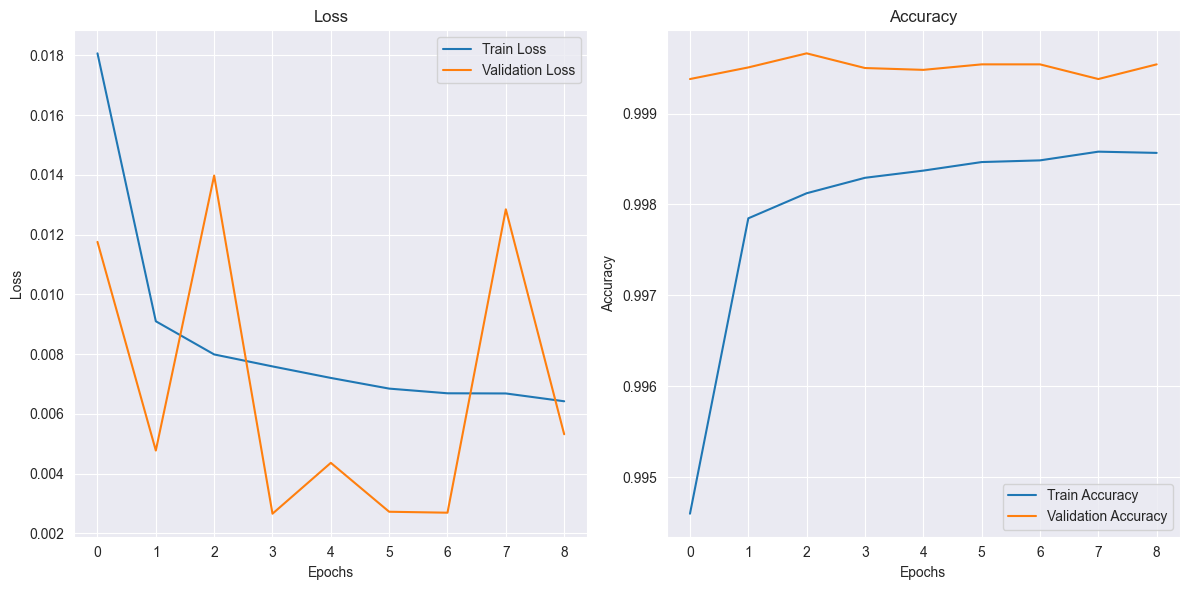

In [6]:
# Hiển thị lịch sử huấn luyện
plt.figure(figsize=(12, 6))

# Biểu đồ loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Biểu đồ accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()

plt.savefig(os.path.join(plot_dir, "ann_loss_accuracy.png"))
plt.show()


### Lưu mô hình ANN
Mô hình được lưu vào file `models/ann_model.keras`.


In [7]:
# Lưu mô hình đã huấn luyện
model.save(f"{model_dir}/ann_model.keras")
print("Mô hình ANN đã được lưu tại: ann_model.keras")


Mô hình ANN đã được lưu tại: ann_model.keras
